In [1]:
import torch
from torch.autograd import Variable
from torch.nn import functional as F
import numpy as np
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt

In [2]:
data = load_boston()

inputs =  data.data
targets = data.target

inputs = torch.from_numpy(inputs).float()
targets = torch.from_numpy(targets).float().view(-1, 1)

inputs = (inputs - inputs.mean()) / inputs.std()

epoch : 0, loss = 115.57566833496094
epoch : 1, loss = 98.57133483886719
epoch : 2, loss = 89.26811981201172
epoch : 3, loss = 83.18084716796875
epoch : 4, loss = 79.40440368652344
epoch : 5, loss = 76.69660949707031
epoch : 6, loss = 75.0906753540039
epoch : 7, loss = 73.86961364746094
epoch : 8, loss = 72.85379028320312
epoch : 9, loss = 72.1590576171875
epoch : 191, loss = 56.2164306640625
epoch : 192, loss = 56.244564056396484
epoch : 193, loss = 56.18397903442383
epoch : 194, loss = 56.1606330871582
epoch : 195, loss = 56.14643478393555
epoch : 196, loss = 56.152137756347656
epoch : 197, loss = 56.15289306640625
epoch : 198, loss = 56.2702522277832
epoch : 199, loss = 56.077205657958984


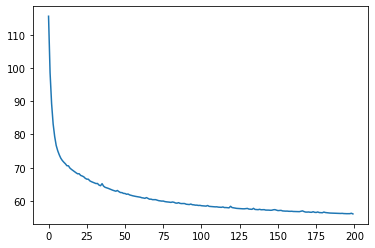

In [3]:
from torch.utils.data import TensorDataset, DataLoader

# Define dataset
train_ds = TensorDataset(inputs, targets)

# Define data loader
batch_size = 5
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

# Define model
model = torch.nn.Linear(13, 1)  # inputs.shape[1]

# Define optimizer
opt = torch.optim.SGD(model.parameters(), lr=1e-3)

# Define loss function
loss_fn = F.mse_loss

cache = []
# Define a utility function to train the model
def fit(num_epochs, model, loss_fn, opt):
    global train_dl
    global cache
    for epoch in range(num_epochs):
        for xb, yb in train_dl:
            # Generate predictions
            y_pred = model(xb)
            loss = loss_fn(y_pred, yb)
            
            # Perform gradient descent
            loss.backward()
            opt.step()
            opt.zero_grad()
        cache.append([epoch, loss_fn(model(inputs), targets)])
#         print('Training loss: ', loss_fn(model(inputs), targets))
        
# Train the model for 100 epochs
fit(200, model, loss_fn, opt)
[print(f"epoch : {epoch}, loss = {loss}") for epoch, loss in cache if epoch < 10 or epoch > 190]
epochs = [epoch[0] for epoch in cache]
losses = [loss[1] for loss in cache]


# Generate predictions
preds = model(inputs)

plt.plot(epochs, losses)
plt.show()
plt.close()